In [7]:
import pandas as pd 
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import glob

%matplotlib inline
sns.set_style("white")

base_dir = os.path.dirname(os.getcwd())

plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
sns.set_style(style='ticks')

# Study 1 - Across conversations

In [8]:
data_turn_taking = pd.read_csv(os.path.join(base_dir,'Analyses','turn_taking_strangers.csv'))
data_connection = pd.read_csv(os.path.join(base_dir,'Analyses','connection_strangers.csv'))
data_outcomes = pd.read_csv(os.path.join(base_dir,'Analyses','post_convo_survey_with_factors_strangers.csv'))

data_interim = pd.merge(data_turn_taking, data_outcomes, how='inner', on=['subID', 'partnerID'])
data = pd.merge(data_interim, data_connection, how='inner', on=['subID', 'partnerID'])

# center features within subject
# mimics the random effect structure used in regression

features = ['mean_gap_convo', 'factor_1', 'avg_connection']
for feature in features:
    store_mean = data.groupby('subID')[feature].mean()
    new_feature = feature + '_centered'
    for i in range(len(data)):  
        sub = int(data.at[i,'subID'])
        data.at[i, new_feature] = data.at[i, feature] - store_mean[sub] # this changed in python 3.8.
                                                                        # need to call row number, not
                                                                        # subID number
                                                                        # for newer versions, use store_mean.loc['103']

/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


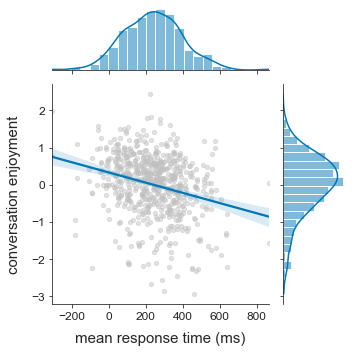

In [9]:
fig = sns.jointplot("mean_gap_convo", "factor_1_centered", data=data, kind="reg",
                    color='#0077b6',
                    space=0, height=5, ratio=3,
             scatter_kws={"color":"silver","alpha":0.45,"s":18},
                   marginal_kws={'hist_kws': {'alpha': 1}})
fig.set_axis_labels('mean response time (ms)', 'conversation enjoyment',
                   fontsize=15, labelpad=10)

ax = fig.ax_joint
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Figures','figure_2A.pdf'), dpi=300)

/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


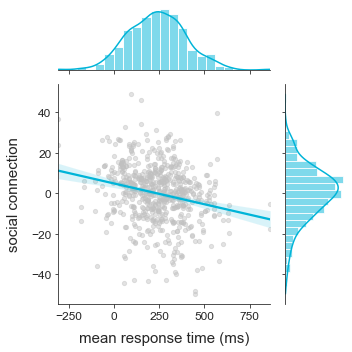

In [10]:
fig = sns.jointplot("mean_gap_convo", "avg_connection_centered", data=data, kind="reg",
                    color='#00b4d8',
                    space=0, height=5, ratio=3,
             scatter_kws={"color":"silver","alpha":0.45,"s":18},
                   marginal_kws={'hist_kws': {'alpha': 1}})
fig.set_axis_labels('mean response time (ms)', 'social connection',
                   fontsize=15, labelpad=10)

ax = fig.ax_joint
ax.tick_params(labelsize=12)

plt.tight_layout()
plt.savefig(os.path.join(base_dir,'Figures','figure_2B.pdf'), dpi=300)

# Study 1 - Individual Differences

In [11]:
data_turn_taking = pd.read_csv(os.path.join(base_dir,'Analyses','turn_taking_strangers.csv'))
data_connection = pd.read_csv(os.path.join(base_dir,'Analyses','connection_strangers.csv'))
data_outcomes = pd.read_csv(os.path.join(base_dir,'Analyses','post_convo_survey_with_factors_strangers.csv'))

data_interim = pd.merge(data_turn_taking, data_outcomes, how='inner', on=['subID', 'partnerID'])
data = pd.merge(data_interim, data_connection, how='inner', on=['subID', 'partnerID'])


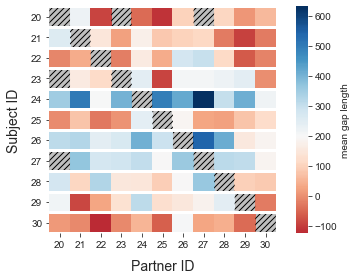

In [12]:
# plot heatmap for a single round robin

round_robins = [2]
round_robins_min_subID = [20]
round_robins_max_subID = [30]

for num in range(len(round_robins)):

    df = pd.DataFrame()
    df = df.fillna(0)

    data_round = data.loc[(data['subID'] >= round_robins_min_subID[num]) & (data['subID'] <= round_robins_max_subID[num])]

    for i in range(round_robins_min_subID[num],(round_robins_max_subID[num]+1)):
        for j in range(round_robins_min_subID[num],(round_robins_max_subID[num]+1)):

            dyad = data_round.loc[(data_round['subID'] == i) & (data_round['partnerID'] == j)].reset_index(drop=True)

            if len(dyad) == 1:
                df.at[i,j] = dyad.at[0,'mean_gap_speaker']
            else:
                df.at[i,j] = np.nan

    ax = sns.heatmap(df, square=True, cmap="RdBu", center=200,
                    cbar_kws={'label': 'mean gap length'})
    plt.yticks(rotation=0)
    ax.set_facecolor("silver")
    ax.pcolor(np.where(df.isna(), 0, np.nan), hatch='////', alpha=0)
    
    for i in range(df.shape[1]+1):
        ax.axhline(i, color='white', lw=3)
    
    plt.xlabel('Partner ID', fontsize=14, labelpad=10)  
    plt.ylabel('Subject ID', fontsize=14, labelpad=10)
    
    plt.tight_layout()
    plt.savefig(os.path.join(base_dir,'figures','figure_3A.pdf'), dpi=300)



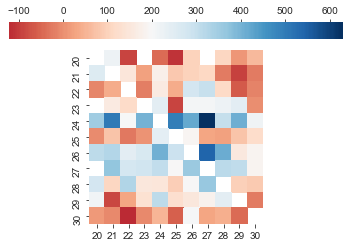

In [13]:
# save a version with a horizontal colorbar to use in final figure

ax = sns.heatmap(df, square=True, cmap="RdBu", center=200,
                    cbar_kws = dict(use_gridspec=False,location="top"))
plt.savefig(os.path.join(base_dir,'figures','figure_3A_colorbar.pdf'), dpi=300)


### Differences in average liking for sub 24 vs sub 30

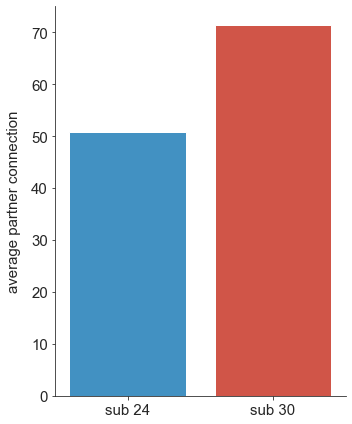

In [14]:
plt.figure(figsize=(5,6))

subs = ['sub 24', 'sub 30']
connection = [50.84,71.45]

ax = sns.barplot(x=subs, y=connection, 
                 palette=['#4291C2', '#D05548'],
                saturation=1)

ax.set_ylabel('average partner connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=15)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'figures','figure_3B.pdf'), dpi=300)


### Relationship between average gap length and average partner liking

/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/Users/emma/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


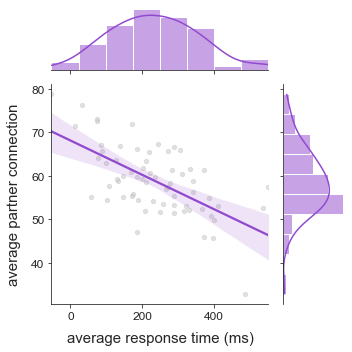

In [15]:
data = pd.read_csv(os.path.join(base_dir,'Analyses','individual_differences.csv'))

fig = sns.jointplot("mean_gap_speaker_self_mean", "avg_connection_partner_mean", data=data, kind="reg",
                    color='#9149CE', 
                    space=0, height=5, ratio=3,
             scatter_kws={"color":"silver","alpha":0.45,"s":18},
                   marginal_kws={'hist_kws': {'alpha': 1}})
fig.set_axis_labels('average response time (ms)', 'average partner connection',
                   fontsize=15, labelpad=10)

ax = fig.ax_joint
ax.tick_params(labelsize=12)

plt.tight_layout()

plt.savefig(os.path.join(base_dir,'figures','figure_3C.pdf'), dpi=300)


# Self vs partner effects

## Between-conversation analysis

Study 1

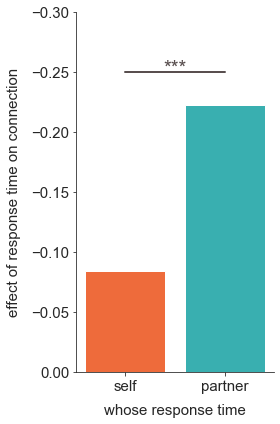

In [16]:
data = [['self', -0.083883], ['partner', -0.222311]]
df = pd.DataFrame(data, columns = ['response time', 'beta'])

plt.figure(figsize=(4,6))

ax=sns.barplot(x="response time", y="beta",data=df,
              palette=['#EE6B3B', '#39AFB0'], saturation=1)

plt.ylim(0, -.3)
ax.tick_params(labelsize=15)

ax.set_ylabel('effect of response time on connection', fontsize=15, labelpad=10)
ax.set_xlabel('whose response time', fontsize=15, labelpad=10)


# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = .005
star_font_size = 20

# strangers
x1, x2 = 0, 1   
y = -0.25
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)-.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'figures','figure_4B.pdf'), dpi=300)


## Within-conversation analyses

Study 1 and Study 2

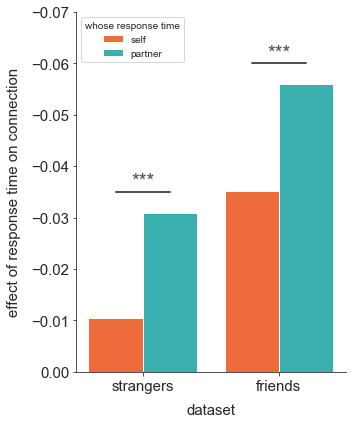

In [17]:
data = [['self', 'strangers', -0.010385, 0.009509, ], ['partner', 'strangers', -0.030927, 0.007024, ],
       ['self', 'friends', -0.03522, 0.01289, ], ['partner', 'friends', -0.05598, 0.01455, ]]
df = pd.DataFrame(data, columns = ['whose response time', 'type', 'beta', 'standard_error'])

plt.figure(figsize=(5,6))

ax=sns.barplot(x="type", y="beta", hue='whose response time',data=df,
             palette=['#EE6B3B', '#39AFB0'], saturation=1)

plt.ylim(0, -.07)
ax.tick_params(labelsize=15)

ax.set_ylabel('effect of response time on connection', fontsize=15, labelpad=10)
ax.set_xlabel('dataset', fontsize=15, labelpad=10)

ax.legend(loc="upper left", title="whose response time")

# significance bar
lw = 2
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.0001
star_font_size = 20

# strangers
x1, x2 = -.20, .20   
y = -0.035
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# friends
x1, x2 = .80, 1.20   
y = -0.06
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

sns.despine()
plt.tight_layout()

plt.savefig(os.path.join(base_dir,'figures','figure_4C.pdf'), dpi=300)


# Study 3

In [18]:
data_full = pd.read_csv(os.path.join(base_dir,'Data','manipulated_gaps.csv'))

# mean center within subject

features = ['enjoy', 'connected']
for feature in features:
    store_mean = data_full.groupby('subID')[feature].mean()
    new_feature = feature + '_centered'
    for i in range(len(data_full)): 
        sub = int(data_full.at[i,'subID'])
        data_full.at[i, new_feature] = data_full.at[i, feature] - store_mean[sub]
        
data_full.to_csv(os.path.join(base_dir,'Analyses','manipulated_gaps_centered.csv'), encoding='utf-8', index=False)


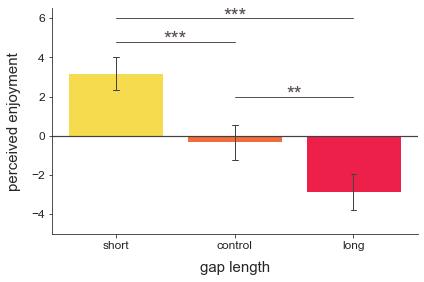

In [19]:
ax = sns.barplot(x="condition", y="enjoy_centered", data=data_full, errwidth=1,
                 capsize=0.05, order=['short','control','long'], 
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('gap length', fontsize=15, labelpad=10)
ax.set_ylabel('perceived enjoyment', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-5, 6.5))

ax.axhline(0, color='#424242', lw=1.2) 

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# short vs long
x1, x2 = 0, 2   
y = 6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 0, 1   
y = 4.8
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 1, 2   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_6A.pdf'), dpi=300)

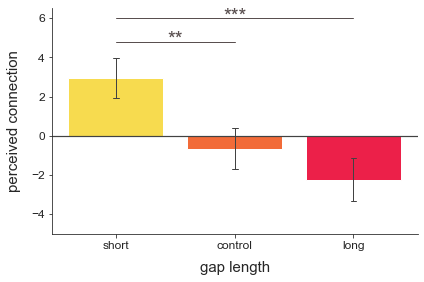

In [20]:
ax = sns.barplot(x="condition", y="connected_centered", data=data_full, errwidth=1,
                 capsize=0.05, order=['short','control','long'], 
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('gap length', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-5, 6.5))

ax.axhline(0, color='#424242', lw=1.2) 

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.4
star_font_size = 20

# short vs long
x1, x2 = 0, 2   
y = 6
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 0, 1   
y = 4.8
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

plt.savefig(os.path.join(base_dir,'Figures','figure_6B.pdf'), dpi=300)

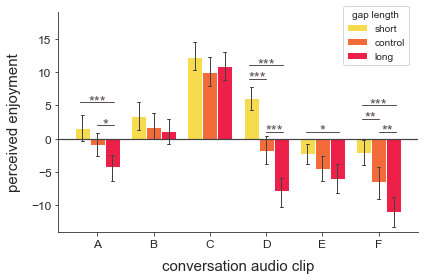

In [21]:
ax = sns.barplot(x="convo", y="enjoy_centered", hue="condition", data=data_full, errwidth=1,
                 capsize=.05, hue_order=['short','control','long'],
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('conversation audio clip', fontsize=15, labelpad=10)
ax.set_ylabel('perceived enjoyment', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-14, 19))

ax.legend(bbox_to_anchor=[0.99, 1.05], title="gap length")
ax.axhline(0, color='#424242', lw=1.2)

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.9
star_font_size = 15

## A
# short vs long
x1, x2 = -0.3, 0.3   
y = 5.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 0, 0.3   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## D
# short vs control
x1, x2 = 2.7, 3   
y = 9
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs long
x1, x2 = 2.7, 3.3   
y = 11
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 3, 3.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## E
# short vs long
x1, x2 = 3.7, 4.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


## F
# short vs long
x1, x2 = 4.7, 5.3   
y = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 4.7, 5   
y = 3
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 5, 5.3   
y = 1
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


plt.savefig(os.path.join(base_dir,'Figures','figure_6C.pdf'), dpi=300)

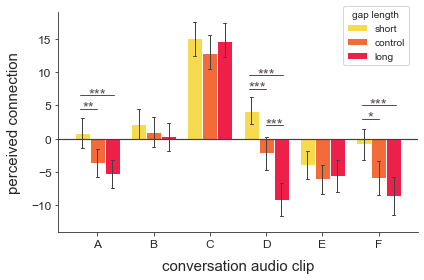

In [22]:
ax = sns.barplot(x="convo", y="connected_centered", hue="condition", data=data_full, errwidth=1,
                 capsize=.05, hue_order=['short','control','long'],
                 palette=['#F7DB4F','#F26B38', '#EC2049'],
                saturation=1)

ax.set_xlabel('conversation audio clip', fontsize=15, labelpad=10)
ax.set_ylabel('perceived connection', fontsize=15, labelpad=10)
ax.tick_params(labelsize=12)
ax.set(ylim=(-14, 19))

ax.legend(bbox_to_anchor=[0.99, 1.05], title="gap length")
ax.axhline(0, color='#424242', lw=1.2)

sns.despine()
plt.tight_layout()

lw = 1
line_color = '#594F4F' # create thinner, greyer lines
star_color = '#594F4F'
h = 0
space_between_stars_and_line = -.9
star_font_size = 15

## A
# short vs long
x1, x2 = -0.3, 0.3   
y = 6.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = -0.3, 0   
y = 4.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "**", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## D
# short vs control
x1, x2 = 2.7, 3   
y = 7.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs long
x1, x2 = 2.7, 3.3   
y = 9.5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# control vs long
x1, x2 = 3, 3.3   
y = 2
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

## F
# short vs long
x1, x2 = 4.7, 5.3   
y = 5
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "***", ha='center', va='bottom', color=star_color, fontsize=star_font_size)

# short vs control
x1, x2 = 4.7, 5   
y = 3
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=lw, c=line_color)
plt.text((x1+x2)*.5, y+space_between_stars_and_line, "*", ha='center', va='bottom', color=star_color, fontsize=star_font_size)


plt.savefig(os.path.join(base_dir,'Figures','figure_6D.pdf'), dpi=300)